# Step 1: Preliminaries and Data Generation

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
# Generate mock data
np.random.seed(0)
X = np.random.randn(100, 1)
y = (X > 0).astype(np.float64).ravel()

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Step 2: Define the Sigmoid Function

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Define the Cost Function

In [30]:
def cost_function(theta, X, y):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    error = (-y * np.log(predictions)) - ((1-y) * np.log(1-predictions))
    cost = 1/m * sum(error)
    # Ensure cost is an array
    if not isinstance(cost, np.ndarray):
        cost = np.array([cost])
    gradient = 1/m * np.dot(X.transpose(), (predictions - y))
    return cost[0], gradient

# Step 4: Gradient Descent

In [31]:

def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        cost, gradient = cost_function(theta, X, y)
        theta -= alpha * gradient
        cost_history.append(cost)
    return theta, cost_history

# Step 5: Training the Model

In [32]:
# Add an intercept column to X
X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)
print(f"Estimated parameters: {theta}")

Estimated parameters: [0.17201048 1.87003478]


# Step 6: Plotting the Cost Function

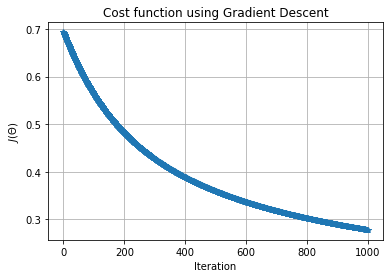

In [33]:
plt.plot(cost_history,marker='*',linewidth=0.1)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.grid()
plt.show()

In [94]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [106]:
p_pred = model.predict_proba(X)
#p_pred = p_pred.astype(int)
y_pred = model.predict(X)
score_ = model.score(X, y)
cm = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)
p_pred

array([[9.59682927e-04, 9.99040317e-01],
       [1.42285958e-01, 8.57714042e-01],
       [1.83111006e-02, 9.81688899e-01],
       [1.58593980e-04, 9.99841406e-01],
       [6.49346434e-04, 9.99350654e-01],
       [9.67898511e-01, 3.21014893e-02],
       [2.03611398e-02, 9.79638860e-01],
       [5.71181144e-01, 4.28818856e-01],
       [5.26188585e-01, 4.73811415e-01],
       [1.37540551e-01, 8.62459449e-01],
       [3.03840685e-01, 6.96159315e-01],
       [3.08567682e-03, 9.96914323e-01],
       [4.07185884e-02, 9.59281412e-01],
       [3.22001771e-01, 6.77998229e-01],
       [1.23303478e-01, 8.76696522e-01],
       [1.75762941e-01, 8.24237059e-01],
       [2.65608647e-03, 9.97343914e-01],
       [6.20078563e-01, 3.79921437e-01],
       [1.87324492e-01, 8.12675508e-01],
       [9.49834409e-01, 5.01655906e-02],
       [9.99913716e-01, 8.62835442e-05],
       [5.98740237e-02, 9.40125976e-01],
       [2.79214299e-02, 9.72078570e-01],
       [9.25407149e-01, 7.45928508e-02],
       [1.422167

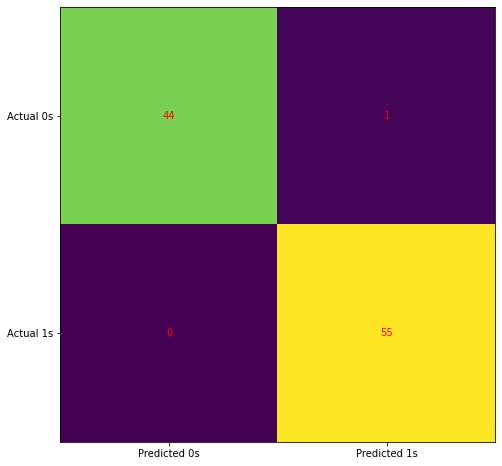

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [89]:
def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr,marker='*')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(thresholds)

[2. 1. 0.]


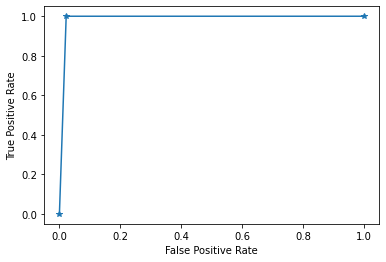

In [99]:
plot_roc_curve(y,y_pred)